In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
from fastai.vision.all import *
from fastbook import *

In [3]:
## Downloading and extracting MNIST data set 
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
path.ls()

(#3) [Path('/Users/v/.fastai/data/mnist_sample/valid'),Path('/Users/v/.fastai/data/mnist_sample/labels.csv'),Path('/Users/v/.fastai/data/mnist_sample/train')]

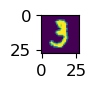

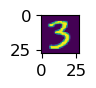

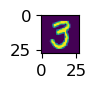

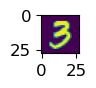

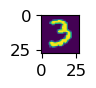

In [5]:
# Checking the traing data for number 3
threes = (path/'train'/'3').ls().sorted()
for i in range(5):
    img = Image.open(threes[i])
    plt.figure(figsize=(1,0.5))
    plt.imshow(img)
    plt.show()

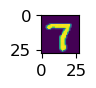

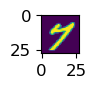

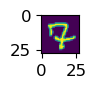

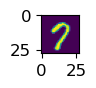

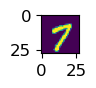

In [6]:
sevens = (path/'train'/'7').ls().sorted()
for i in range(5):
    img = Image.open(sevens[i])
    plt.figure(figsize=(1,0.5))
    plt.imshow(img)
    plt.show()

## Visulaizing Seven Image Pixel Values

In [8]:
## Loading the pixel values of the image into tensor
img_7 = Image.open(sevens[0])
img_7_tensor = tensor(img_7)
img_7_tensor.shape

torch.Size([28, 28])

In [9]:
img_7_tensor[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [ 21,  51, 213, 254, 252, 252],
        [161, 250, 250, 252, 250, 250],
        [250, 250, 250, 252, 189, 190]], dtype=torch.uint8)

In [10]:
!pip install kaleido


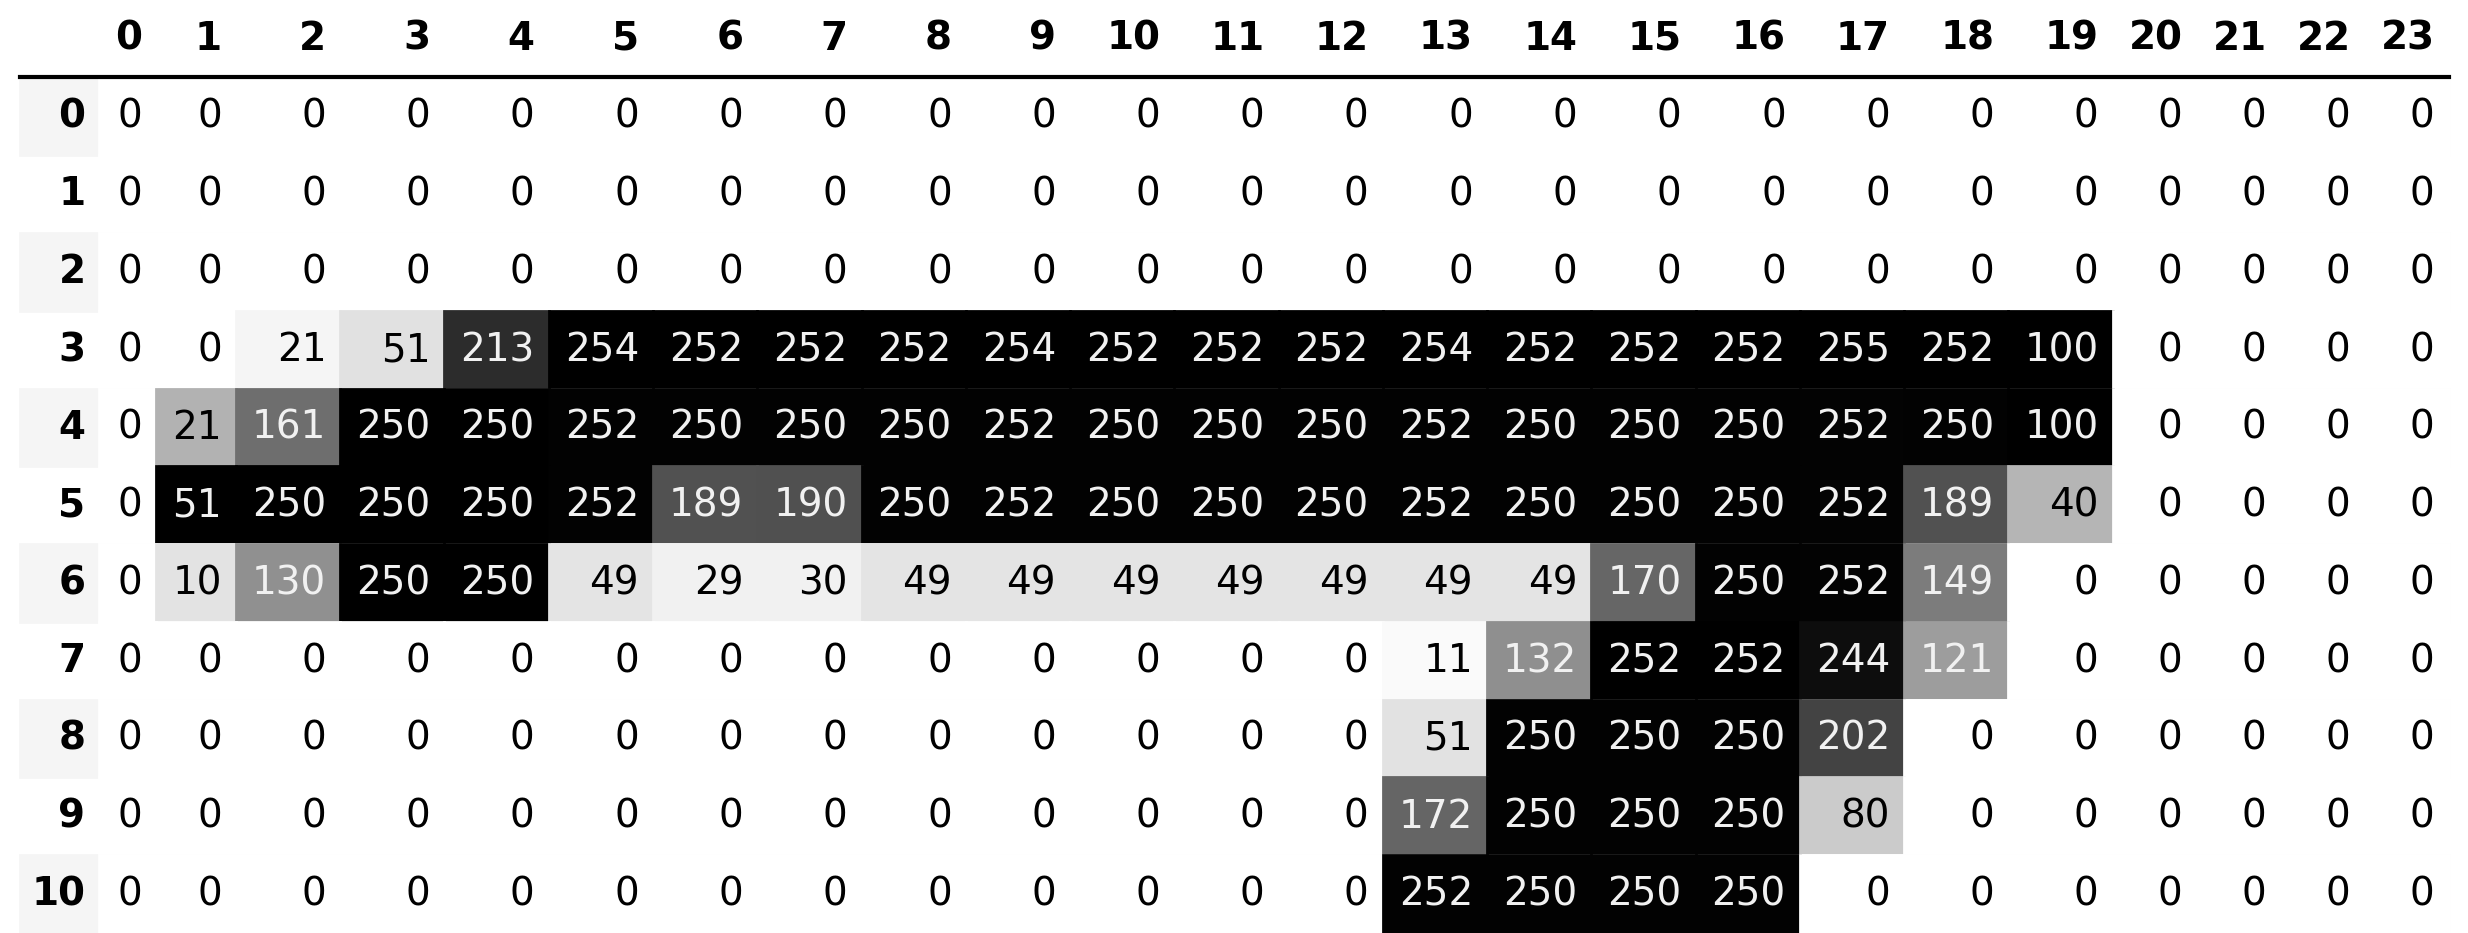

In [11]:
import pandas as pd
import dataframe_image as dfi
from IPython.display import display, Image as ipyimage

df = pd.DataFrame(img_7_tensor[4:15,2:26])
styled_df = df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

dfi.export(styled_df, 'styled_df.png', table_conversion='matplotlib')
display(ipyimage(filename='styled_df.png'))


## Visulaizing Three Image Pixel Values

In [13]:
## Loading the pixel values of the image into tensor
img_3 = Image.open(threes[1])
img_3_tensor = tensor(img_3)
img_3_tensor.shape

torch.Size([28, 28])

In [14]:
img_3_tensor[4:15,4:15]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254],
        [  0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253],
        [  0,  93, 244, 249, 253, 187,  46,  10,   8,   4,  10],
        [  0, 107, 253, 253, 230,  48,   0,   0,   0,   0,   0],
        [  0,   3,  20,  20,  15,   0,   0,   0,   0,   0,  43],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249],
        [  0,   0,   0,   0,   0,   0,   0,  14, 101, 223, 253],
        [  0,   0,   0,   0,   0,  11, 166, 239, 253, 253, 253],
        [  0,   0,   0,   0,   0,  16, 248, 250, 253, 253, 253],
        [  0,   0,   0,   0,   0,   0,   0,  43,  98,  98, 208]], dtype=torch.uint8)

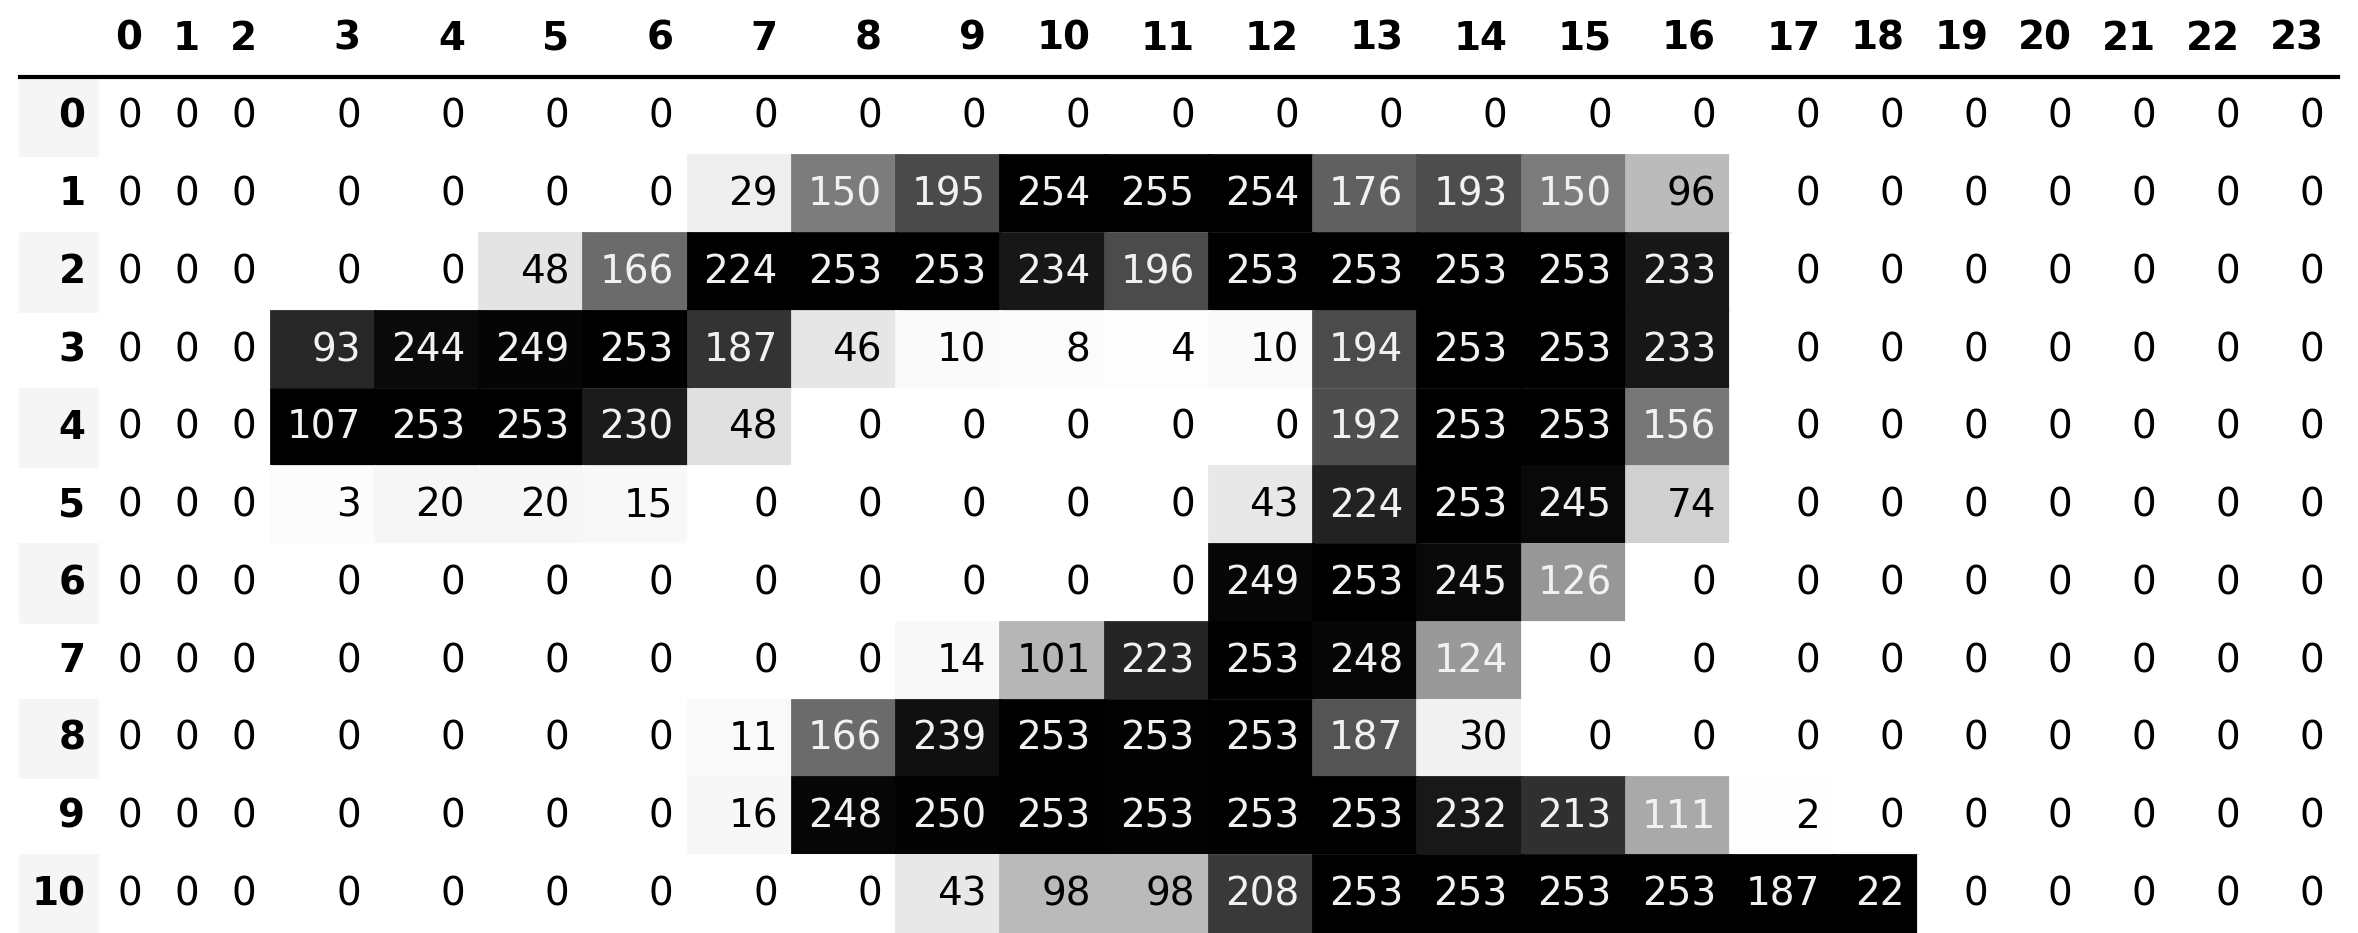

In [15]:
df = pd.DataFrame(img_3_tensor[4:15,2:26])
styled_df = df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')
dfi.export(styled_df, 'styled_df.png', table_conversion='matplotlib')
display(ipyimage(filename='styled_df.png'))

## Loading all Images data into tensors

In [17]:
# loading the image into tensor using stack
threes_array = [tensor(Image.open(image)) for image in threes]
threes_stack = torch.stack(threes_array).float()/255
threes_stack.shape

torch.Size([6131, 28, 28])

In [18]:
sevens_array = [tensor(Image.open(image)) for image in sevens]
sevens_stack = torch.stack(sevens_array).float()/255
sevens_stack.shape

torch.Size([6265, 28, 28])

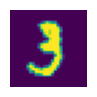

In [19]:
show_image(threes_stack[0])
plt.show()

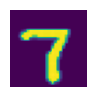

In [20]:
show_image(sevens_stack[0])
plt.show()

# Creating Traning Data

In [22]:
## Here we are merging both 3 and 7 tensors to make a single traning set
train_x = torch.cat([threes_stack,sevens_stack])
train_x.shape

torch.Size([12396, 28, 28])

In [23]:
## converting the all the 2d pixel data into single array 
train_x = train_x.view((-1,(28*28)))
train_x.shape

torch.Size([12396, 784])

In [24]:
train_y = tensor([1]*len(threes_stack)+[0]*len(sevens_stack))
train_y.shape

torch.Size([12396])

In [25]:
# adding extra dimension for output because inorder to merge dependent data with independent data their dimensions should match
train_y = train_y.unsqueeze(1)
train_y.shape

torch.Size([12396, 1])

In [26]:
train_dset = list(zip(train_x,train_y))
x,y = train_dset[0]
x.shape,y.shape

(torch.Size([784]), torch.Size([1]))

# Creating Validation  and Test Set

In [28]:
path.ls()

(#3) [Path('/Users/v/.fastai/data/mnist_sample/valid'),Path('/Users/v/.fastai/data/mnist_sample/labels.csv'),Path('/Users/v/.fastai/data/mnist_sample/train')]

In [29]:
validate_3_path = path/'valid/3'

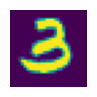

In [30]:
validate_3_array = [tensor(Image.open(img)) for img in validate_3_path.ls()]
validate_3_stack = torch.stack(validate_3_array).float()/255
show_image(validate_3_stack[0])
plt.show()

In [31]:
validate_7_path = path/'valid/7'

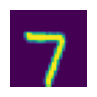

In [32]:
validate_7_array = [tensor(Image.open(img)) for img in validate_7_path.ls()]
validate_7_stack = torch.stack(validate_7_array).float()/255
show_image(validate_7_stack[0])
plt.show()

In [33]:
validate_x = torch.cat([validate_3_stack,validate_7_stack])
validate_x.shape

torch.Size([2038, 28, 28])

In [34]:
## creating test and validation indexes
num_test_samples = 100
indices = torch.randperm(validate_x.size(0))
test_indices = indices[:num_test_samples]
remaining_indices = indices[num_test_samples:]

In [35]:
test_x = validate_x[test_indices]
validate_x = validate_x[remaining_indices]
test_x.shape,validate_x.shape

(torch.Size([100, 28, 28]), torch.Size([1938, 28, 28]))

In [36]:
validate_x = validate_x.view((-1,28*28))
validate_x.shape

torch.Size([1938, 784])

In [37]:
validate_y = tensor([1]*len(validate_3_stack)+[0]*len(validate_7_stack))
validate_y.shape

torch.Size([2038])

In [38]:
validate_y = validate_y.unsqueeze(1)
validate_y.shape

torch.Size([2038, 1])

In [39]:
test_y = validate_y[test_indices]
validate_y = validate_y[remaining_indices]
test_y.shape,validate_y.shape

(torch.Size([100, 1]), torch.Size([1938, 1]))

In [40]:
validate_dset = list(zip(validate_x,validate_y))
len(validate_dset)

1938

## Creating Neural Network model

In [42]:
# creating random wieghts and bias
init_params = lambda size,std=1.0 : (torch.randn(size)*std).requires_grad_()

In [43]:
weights = init_params((28*28,1))
weights.shape,weights[0:5]

(torch.Size([784, 1]),
 tensor([[-0.4352],
         [-1.2878],
         [ 1.9290],
         [-0.1388],
         [-0.4320]], grad_fn=<SliceBackward0>))

In [44]:
bias = init_params(1)
bias

tensor([-0.0261], requires_grad=True)

In [45]:
# creating a linear relationship model
linear_model = lambda xb,weights,bias : xb@weights+bias

In [46]:
## defining loss function
def loss_fun(pred,targ):
    pred = pred.sigmoid()
    return torch.where(targ==1,1-pred,pred).mean()

In [47]:
# calcluating Gradient
def cal_grad(X,y,weights,bias,model,loss_fun):
    
    pred = model(X,weights,bias)
    loss = loss_fun(pred,y)
    loss.backward()

### Building model using batch gradient

In [49]:
# creating btaches
dl = DataLoader(train_dset,batch_size = 256)

In [50]:
# triang the model using batch gradient menthod
def train_epoch(data,model,loss_fun,weights,bias,learning_rate):
    for X,y in data:
        cal_grad(X,y,weights,bias,model,loss_fun)
        for p in (weights,bias):
            p.data -=p.grad*learning_rate
            p.grad.zero_()

In [51]:
def batch_accu(xb,yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [52]:
def validate_epoch(model,valid_dl,weights,bias):
    accs = [batch_accu(model(X,weights,bias),y) for X,y in valid_dl]
    return round(torch.stack(accs).mean().item(),4)

In [53]:
learning_rate = 1
train_epoch(dl,linear_model,loss_fun,weights,bias,learning_rate)


In [54]:
for i in range(20):
    train_epoch(dl,linear_model,loss_fun,weights,bias,learning_rate)
    # train_epoch(linear_model,loss_fun,lr,params,dl)
    print(validate_epoch(linear_model,validate_dset,weights,bias))

0.888
0.9309
0.9489
0.9515
0.9567
0.9603
0.9623
0.9649
0.967
0.9685
0.9696
0.9711
0.9716
0.9727
0.9727
0.9727
0.9737
0.9742
0.9742
0.9742


# Testing

## Testing single test image

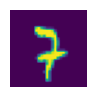

torch.Size([28, 28])

In [57]:
test_img_x = test_x[0]
show_image(test_img_x)
plt.show()
test_img_x.shape

In [58]:
test_img_y = test_y[0]
test_img_y

tensor([0])

In [59]:
# converting pixeles into single dimention
test_img_x = test_img_x.view(-1,28*28)
test_img_x.shape

torch.Size([1, 784])

In [60]:
# giving the test input to nueral network and checking th output
test_img_pred = (linear_model(test_img_x,weights,bias) > 0.5).float()
test_img_pred

tensor([[0.]])

In [61]:
# checking the predicted value with orginal value
test_img_y == test_img_pred

tensor([[True]])

## Testing accuracy on test images

In [63]:
test_x.shape

torch.Size([100, 28, 28])

In [64]:
test_x = test_x.view(-1,28*28)
test_x.shape

torch.Size([100, 784])

In [65]:
test_dset = list(zip(test_x,test_y))
test_pred = validate_epoch(linear_model,test_dset,weights,bias)
test_pred

0.99

In [7]:
from fastai2.vision.all import * 
path = untar_data(URLs.PETS)

ModuleNotFoundError: No module named 'fastai2'